In [ ]:
"""
Defining band cut-offs from peak center frequency, power width and bandwidth 
"""

### Set path

In [2]:
# define path
PROJECT_PATH = 'G:/Shared drives/v1_v4_1024'

### Imports

In [3]:
# general
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_spec = pd.read_csv(f"{PROJECT_PATH}/data/results/lfp_spectral_params.csv")
df_spec

,Unnamed: 0,session,channel,chan_idx,array,epoch,offset,knee,exponent,cf_0,...,pw_1,bw_1,cf_2,pw_2,bw_2,cf_3,pw_3,bw_3,error,r_squared
0,0,A_SNR_140819,0,0,1,pre,8.250311,5413.760937,3.660094,20.761566,...,0.197448,9.742920,69.580402,0.226458,4.000000,NaN,NaN,NaN,0.031894,0.998489
1,1,A_SNR_140819,1,1,1,pre,8.123542,5823.334791,3.641594,21.187425,...,0.218554,9.161468,69.608105,0.252213,4.000000,NaN,NaN,NaN,0.024117,0.998853
2,2,A_SNR_140819,2,2,1,pre,7.435895,1192.281172,3.096264,13.167393,...,0.230272,11.088440,83.034727,0.265393,20.000000,NaN,NaN,NaN,0.051569,0.994847
3,3,A_SNR_140819,3,3,1,pre,8.042354,5815.931666,3.603246,21.469165,...,0.174634,9.513133,69.419959,0.268177,4.000000,NaN,NaN,NaN,0.021202,0.998999
4,4,A_SNR_140819,4,4,1,pre,7.885415,4011.093210,3.485834,21.199995,...,0.179327,10.023394,69.388871,0.270873,4.000000,NaN,NaN,NaN,0.021975,0.998878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,6139,A_SNR_041018,59,1019,16,post,8.218674,920.375636,2.957407,15.313949,...,0.361749,6.217917,53.053373,0.417390,7.605257,66.240554,0.618275,12.202779,0.036642,0.997392
6140,6140,A_SNR_041018,60,1020,16,post,7.957116,524.482942,2.840909,15.249014,...,0.337440,5.783263,52.554341,0.341313,6.525079,66.035262,0.526361,13.776319,0.037998,0.997116
6141,6141,A_SNR_041018,61,1021,16,post,7.514403,161.380709,2.477766,15.290988,...,0.274705,4.258126,52.224874,0.303241,6.001945,66.135492,0.458828,15.696865,0.038280,0.996419
6142,6142,A_SNR_041018,62,1022,16,post,7.782704,394.067650,2.638067,18.368436,...,0.335045,6.784725,66.136008,0.497800,13.875347,NaN,NaN,NaN,0.039157,0.996628


In [17]:
for i in range(len(df_spec)):
    if df_spec.loc[i, "epoch"] == 'pre':
        
        for count in range(0,3):
            print(df_spec.loc[i, f'cf_{count}'])
    
    else:
        for count in range(0,3):
            print(df_spec.loc[i, f'cf_{count}'])


20.76156574533009
66.59181085625251
69.58040157024047
21.1874247898118
65.21564414488236
69.60810459413088
13.167392665364586
21.054150709562464
83.03472655290605
21.46916531338472
64.4776462228963
69.41995935119608
21.199995186223283
64.59628872524024
69.38887112028112
21.462671055914164
64.33448078712146
69.37920769308916
22.19681201714624
64.64421303521601
69.47199557906512
24.74725341018199
65.50299368878551
70.11798863691341
20.88193710723886
66.57107955016241
69.21017283337709
20.20397384705228
72.33953173566562
nan
20.454721092868297
65.54409102296387
69.4957343357868
20.249815947999146
66.4733270801946
69.34653454768231
21.710718958114747
63.69980854835316
69.2923584689035
21.384615965660284
64.80604939005441
69.4543836567978
13.652239252008629
22.60334240437695
74.34638907747443
24.357145786952746
65.15695285485927
69.76323839506861
20.774367873353583
66.20728361413136
69.21370933904103
20.504067499718484
64.5539680168097
69.4660827031717
20.38048327716225
64.48802353570206
69

In [18]:
# get variable values for pre-stimulus 
pre_cf=[]
pre_pw=[]
pre_bw=[]   

# get variable values for post-stimulus
post_cf=[]
post_pw=[]
post_bw=[]   

for i in range(len(df_spec)):                                 
    
    if df_spec.loc[i, "epoch"] == 'pre':
        
        for count in range(0,3):
            pre_cf.append(df_spec.loc[i, f'cf_{count}'])
            pre_pw.append(df_spec.loc[i, f'pw_{count}'])
            pre_bw.append(df_spec.loc[i, f'bw_{count}'])
    
    else:
        for count in range(0,3):
            post_cf.append(df_spec.loc[i, f'cf_{count}'])
            post_pw.append(df_spec.loc[i, f'pw_{count}'])
            post_bw.append(df_spec.loc[i, f'bw_{count}'])

    


C:\Users\Andre\AppData\Local\Temp\ipykernel_18280\4239629605.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


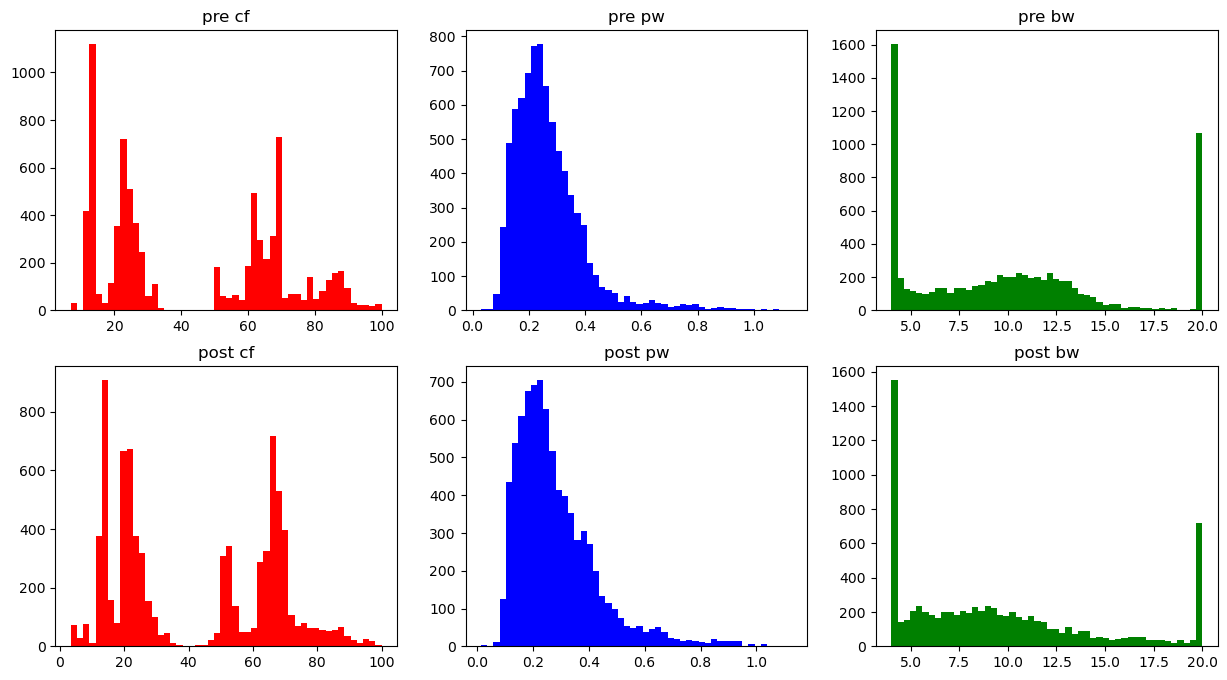

In [31]:
fig, axs = plt.subplots(2, 3)
# cf
axs[0,0].hist(pre_cf, bins=50, color='red')
axs[0,0].set_title('pre cf')
axs[1,0].hist(post_cf, bins=50, color='red')
axs[1,0].set_title('post cf')

#pw
axs[0,1].hist(pre_pw, bins=50, color='blue')
axs[0,1].set_title('pre pw')
axs[1,1].hist(post_pw, bins=50, color='blue')
axs[1,1].set_title('post pw')

#bw
axs[0,2].hist(pre_bw, bins=50, color='green')
axs[0,2].set_title('pre bw')
axs[1,2].hist(post_bw, bins=50, color='green')
axs[1,2].set_title('post bw')

fig.set_size_inches(15,8)
fig.show()